In [1]:
import pandas as pd # Dataframe operations
import numpy as np # math operations
import matplotlib.pyplot as plt # Diagrams / plots
import seaborn as sns # Diagram / Plots
# path
#file lication _ filename + extention
path=r"C:\Users\shara\OneDrive\Documents\Data Science\EDA\Datafiles\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**Steps in outlier analysis**

- Step-1: Find the Q1,Q2 and Q3
    
    - np.percentile(columndata,q)

- Step-2: Calculate the IQR
    
    - IQR=Q3-Q1
    
- Step-3: Calculate lower boundary and upper boundary
    
   - lb:Q1-1.5IQR
    
   - ub: Q3+1.5IQR
        
- Step-4: Find the outlier
    
    - c1: column data < lb
    
    - c2: column data > ub
        
    - c: apply the main condition 
        
    main data[c]

In [21]:
#################### Step-1 --- ####################
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

##################  Step-2 ###########################

IQR=Q3-Q1

##################### Step-3 #############################
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
##################### Step-4 ######################
c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2
##################### Step-5 ######################
outliers_df=visa_df[con] # c1|c2
outliers_df

##################### Step-6 ######################
c1=visa_df['prevailing_wage']>lb
c2=visa_df['prevailing_wage']<ub
non_outliers_df=visa_df[c1&c2]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Compare original data with non outliers data**

(array([4580., 3368., 3890., 3942., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

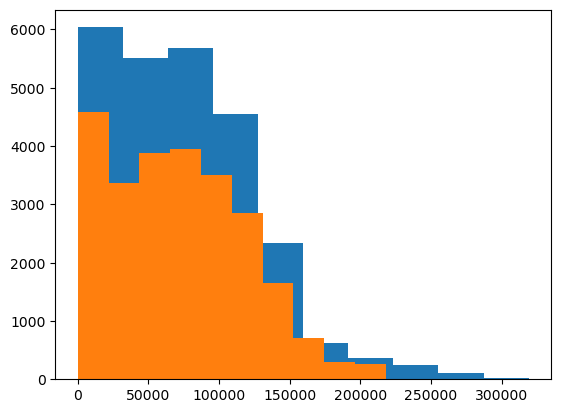

In [22]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outliers_df['prevailing_wage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x175edbc5e50>,
 'caps': [<matplotlib.lines.Line2D at 0x175ed6f5490>,
 'boxes': [<matplotlib.lines.Line2D at 0x175edaefe10>],
 'medians': [<matplotlib.lines.Line2D at 0x175ed6f7e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x175ed9fe290>],
 'means': []}

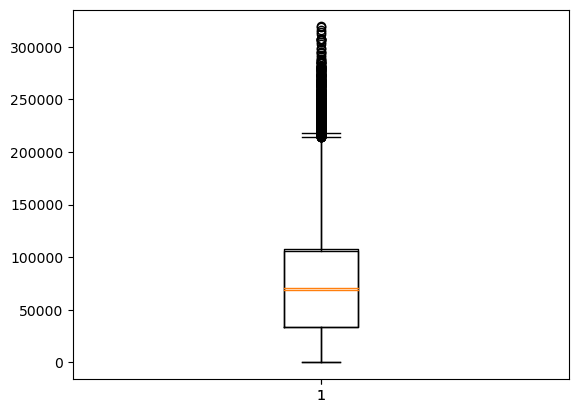

In [23]:
plt.boxplot(visa_df['prevailing_wage'])
plt.boxplot(non_outliers_df['prevailing_wage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x175eea8b410>,
 'caps': [<matplotlib.lines.Line2D at 0x175eea90950>,
 'boxes': [<matplotlib.lines.Line2D at 0x175eea8a8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x175eea91dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x175ee423490>],
 'means': []}

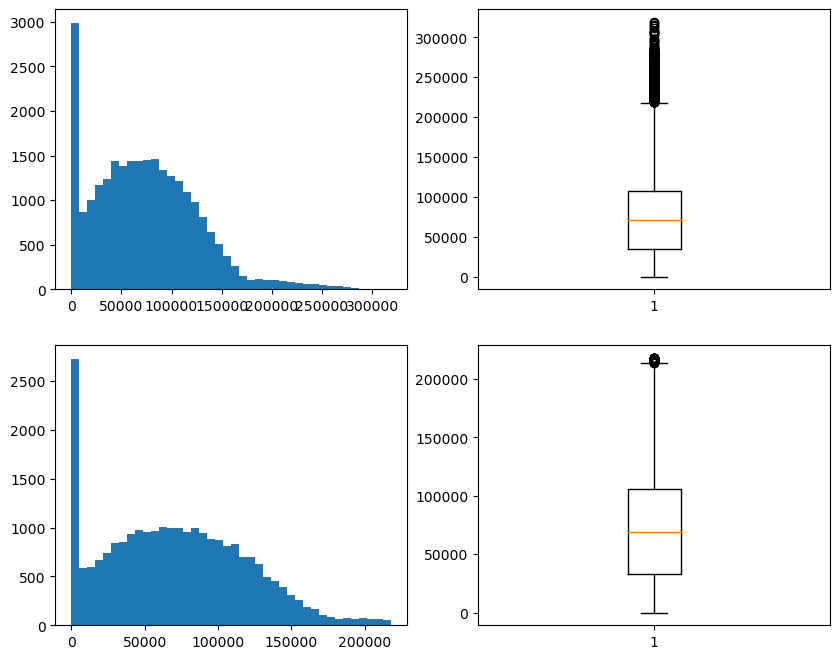

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df['prevailing_wage'])

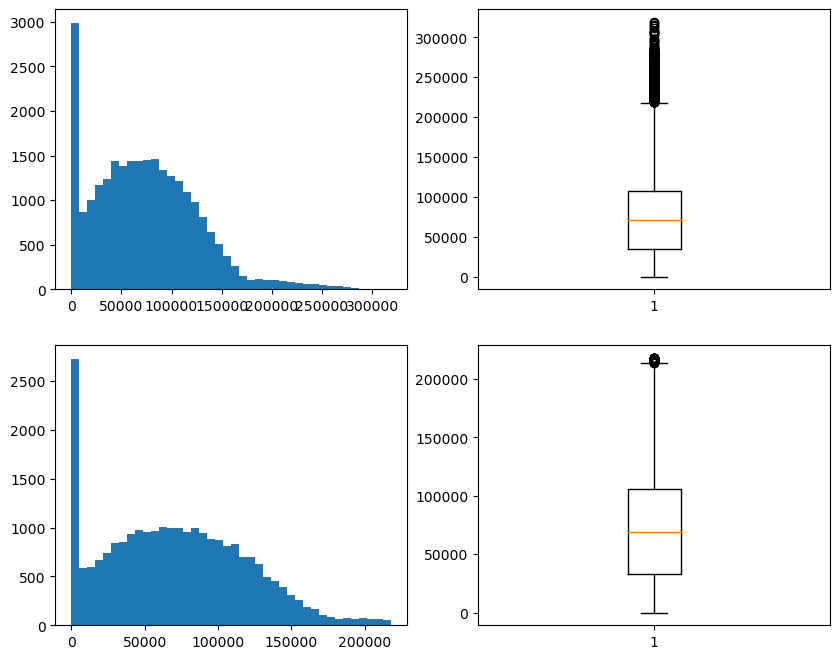

In [25]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3).hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4).boxplot(non_outliers_df['prevailing_wage'])
plt.show()

## How to deal outliers

**Drop the outliers**
    
    - we can drop the outliers if outlier percentage <2%
    
    - But this is not recommended, we lost other columns data also
    
**Impute with Median values**

    - As we know that medican does not affect by outliers
    
    - so it is a good pratice we can impute outliers with Median value
    
**Cap with Q3 or Q1 values**

    - if outliers are present less than lower bounds then fill with Q1
    
    - if outliers are more then upper bounds then fill with Q3

In [7]:
## Task 3 
# Read the each observartion from previling wage
# if that observation < lb or > ub : fill wih median value
# else : keep as it is 

# taken emplty list=[]
# calculate median = visa_df['pwage'].median()
# for i in visa_df['Pwage']:
#    if i <lb or i > ub:
#       emptylist.append(median)
#    else:
#     empltylist.append(i)
outlilers_median=[]
median=visa_df['prevailing_wage'].median()
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=Q3-Q1
lb=Q1-(IQR*1.5)
ub=Q3+(IQR*1.5)
for i in visa_df['prevailing_wage']:
    if i <lb or i > ub:
        outlilers_median.append(median)
    else:
        outlilers_median.append(i)
        
len(outlilers_median)

outlilers_median_df=pd.DataFrame(outlilers_median,columns=['prevailing_wage'])
outlilers_median_df

# Create a new column in exsiting data

visa_df['prevailing_wage_new']=outlilers_median
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,70308.2100
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


In [26]:
#################### Step-1 --- ####################
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

##################  Step-2 ###########################

IQR=Q3-Q1

##################### Step-3 #############################
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

In [28]:
empty_list=[]
median=visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        empty_list.append(median)
    else:
        empty_list.append(i)
        
empty_list

[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 70308.20999999999,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 70308.20999999999,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34

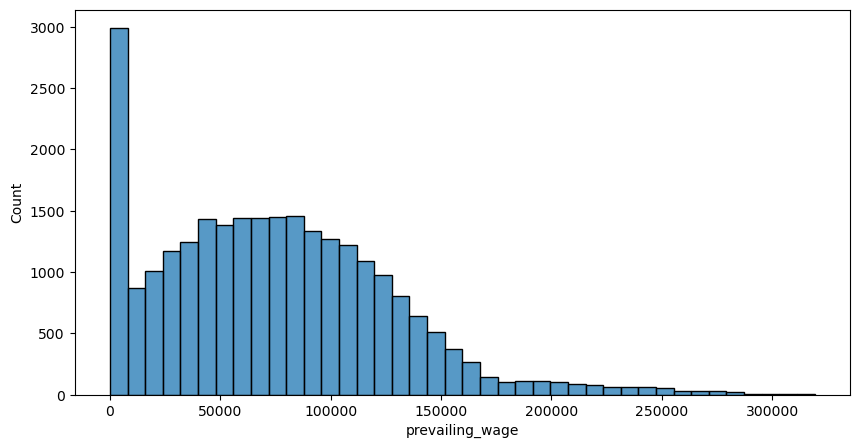

In [3]:
# Draw histogram using seaborn
plt.figure(figsize=(10,5))
sns.histplot(data=visa_df['prevailing_wage'],bins=40)
plt.show()

In [4]:
# Data frame using lowrbond, upperbonds and frequency 

lb=[]
up=[]
f=[]

for index in range(len(n)):
    lb.append(i[index])


NameError: name 'n' is not defined

In [5]:
import pandas as pd # Dataframe operations
import numpy as np # math operations
import matplotlib.pyplot as plt # Diagrams / plots
import seaborn as sns # Diagram / Plots
# path
#file lication _ filename + extention
path=r"C:\Users\shara\OneDrive\Documents\Data Science\EDA\Datafiles\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


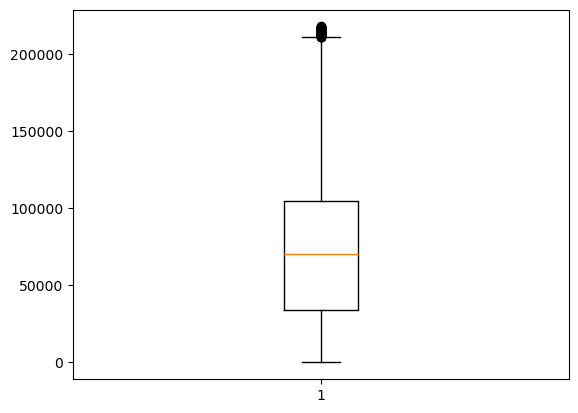

In [8]:
plt.boxplot(visa_df['prevailing_wage_new'])
plt.show()

**np.where**

In [28]:
import pandas as pd # Dataframe operations
import numpy as np # math operations
import matplotlib.pyplot as plt # Diagrams / plots
import seaborn as sns # Diagram / Plots
# path
#file lication _ filename + extention
path=r"C:\Users\shara\OneDrive\Documents\Data Science\EDA\Datafiles\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


- above replce one we use a traditional approach

- for loop,list if-else

- the same we can get by using np.where  method

In [19]:
dict1={'Name':['A','B','C','D'],
      'Num':[1,2,3,4]}
d=pd.DataFrame(dict1)

In [12]:
# i want to replace num which has value >2 
# other wise keep same number
l=[]
for i in d['Num']:
    if i>2:
        l.append(100)
    else:
        l.append(i)

d['Num']=l
d

# How many condiction i >2 if it is True === one value
#                          if it false === another value

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100


np.where(con,True,False)

- Will take 3 arguments
    - Condition
        - con=d['Num']>2
    - True value
        - t=100
    - False value
        - f=d['Num']

In [20]:
l=np.where(d['Num']>2,
         100,
         d['Num'])
d['Num']=l
d

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100


In [29]:
#################### Step-1 --- ####################
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

##################  Step-2 ###########################

IQR=Q3-Q1

##################### Step-3 #############################
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR


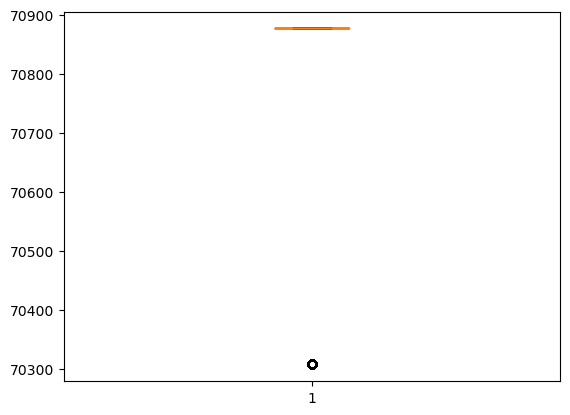

In [27]:
empty_list=[]
median=visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        empty_list.append(median)
    else:
        empty_list.append(i)
        
empty_list


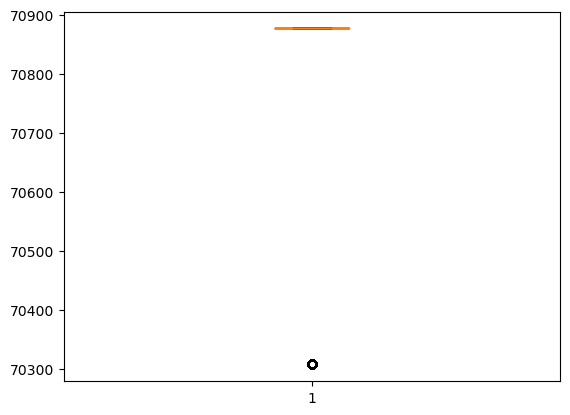

In [30]:
c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2
#con=visa_df['prevailing_wage']<lb or visa_df['prevailing_wage']>ub
visa_df['prevailing_wage']=np.where(con,median,i)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()